In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chisquare

%matplotlib inline


# Analysis of Police killings data from 538

In [2]:

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833,53596,0.388704,1,1,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068,48552,1.195996,4,4,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543,55909,1.190202,4,4,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391,38310,0.793292,2,1,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553,51667,0.862311,3,2,18.4,0.174167,0.102692


In [3]:
count = police_killings["raceethnicity"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


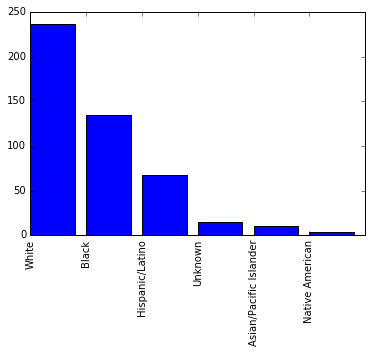

In [4]:
%matplotlib inline

plt.bar(range(6), count)
plt.xticks(range(6), count.index, rotation="vertical")
print count

Total amount of deaths out of a sample of 467 deaths from 2015 police data. (more info on readme)

In [5]:
avg = count/sum(count)


([<matplotlib.axis.XTick at 0x1116e5f90>,
 <a list of 6 Text xticklabel objects>)

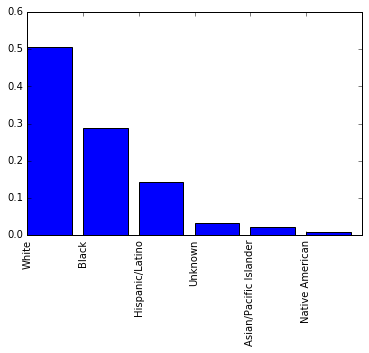

In [6]:
%matplotlib inline

plt.bar(range(6), avg)
plt.xticks(range(6), avg.index, rotation="vertical")


Graph of above converted into percentages.

In [7]:
USpercentage = [.63,.132,.14,.028,.06,.01]
proportion = avg
for i in range(len(avg)):
    proportion[i] = proportion[i]/USpercentage[i]

Percentage of White, Black, Hispanic, Unknown, Asian, and Native American according to Wikipedia https://en.wikipedia.org/wiki/Demography_of_the_United_States 

In [8]:
proportion

White                     0.802148
Black                     2.189994
Hispanic/Latino           1.024778
Unknown                   1.147140
Asian/Pacific Islander    0.356888
Native American           0.856531
Name: raceethnicity, dtype: float64

We see African Americans are twice as likely to be killed by police relative to their demographic percentage, while Asians are least likely to be targeted relative to demographic percentage.

([<matplotlib.axis.XTick at 0x114885350>,
 <a list of 6 Text xticklabel objects>)

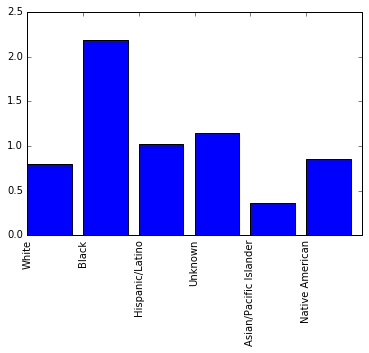

In [9]:
%matplotlib inline

plt.bar(range(6), proportion)
plt.xticks(range(6), proportion.index, rotation="vertical")


The same ratio from above plotted.

In [10]:
USpercentage = [.63,.132,.14,.028,.06,.01]
income =[35243,27213,24918,41221,24944]
USpercentagec = [.74,.132,.028,.06,.01]
#USpercentagec is computed by combining Hispanic/Latino with white
average = np.dot(USpercentagec,income)
#average median income
USpercentage = [x * 467 for x in USpercentage]
#divides 467 so each group is represented base on their demographic make up
chisquare_value, p_value = chisquare(count,USpercentage)
print(chisquare_value,p_value)

(110.81841047365668, 2.7512342898553246e-22)


With a high chi-square value and a p-value of almost zero, our result more than passes the 5% null hypothesis test, stating such results can not be by chance.Income information from: http://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

# Police Killings by Income

In [11]:
income = police_killings["p_income"][police_killings["p_income"] != "-"]
income.astype(int).median()

22348.0

(array([  25.,  179.,  152.,   73.,   26.,    6.,    2.,    1.,    0.,    1.]),
 array([  5457. ,  13513.6,  21570.2,  29626.8,  37683.4,  45740. ,
         53796.6,  61853.2,  69909.8,  77966.4,  86023. ]),
 <a list of 10 Patch objects>)

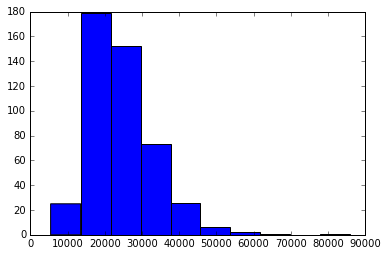

In [12]:
plt.hist(income.astype(int))

Personal (not household) income is based on the area of death, not where person is from. We find the average Personal United States income is around 33,000 (taken by averaging median income from http://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk) much higher than the 22,348 average of people shooting victims. More information of income based on demographic can be found through the link.

# Analysis of Police Shootings based on states

In [13]:
counts = police_killings["state_fp"].value_counts()

In [14]:
state_pop = pd.read_csv("statepopulation.csv")
state_pop

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3
5,40,4,9,6,California,39144818,30023902,76.7
6,40,4,8,8,Colorado,5456574,4199509,77.0
7,40,1,1,9,Connecticut,3590886,2826827,78.7
8,40,3,5,10,Delaware,945934,741548,78.4
9,40,3,5,11,District of Columbia,672228,554121,82.4


In [15]:
states = pd.DataFrame({"STATE": counts.index,"shootings":counts})

In [16]:
states = pd.merge(state_pop,states,on = "STATE")

In [17]:
states['pop_million'] = states['POPESTIMATE2015']/1000000

In [18]:
states['rate'] = states['shootings']/states['pop_million']

In [19]:
direct = pd.DataFrame({"Name":states['NAME'], "Ratio": states['rate']})
states.sort(columns = 'rate')

/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_million,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


We observe east coasts states tend to have lower cases of police killings relative to the west 

In [20]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)



/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [21]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
ls = pk[pk['state'].isin(lowest_states)]
hs = pk[pk['state'].isin(highest_states)]

In [22]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [23]:
hs[columns].mean()


pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

# Findings

An interesting fact to note is: there is actually a higher percentage of African Americans(21%) in states with the LOWEST police killings compared to the national percentage of African Americans at 12%. Another interesting trend is, regions with higher Latino percentages(20% compared to national average of 16%) have the HIGHEST rate of police killings. This trend may be attributed to West coast states having a higher hispanic population than the east does.
We also see states with higher police killings tend to have lower average county income, justifying our previous 538 data set analysis.